<a href="https://colab.research.google.com/github/VanshikaBhalla/Comparing-Models-for-Fraud-Detection-/blob/main/Comparing_Models_for_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data loading

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
df = pd.DataFrame(data)
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


# data understanding & EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.duplicated().sum()

np.int64(0)

✅ no null/duplicate values

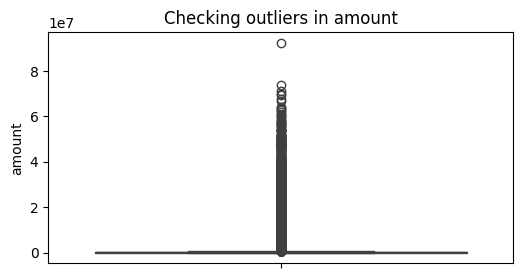

In [ ]:
plt.figure(figsize=[6,3])
plt.title('Checking outliers in amount')
sns.boxplot(df['amount'])
plt.show()

perform log transformation to handle these outliers

In [ ]:
df['log_amount'] = np.log1p(df['amount'])
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9.194276
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,7.531166
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,5.204007


<Axes: ylabel='log_amount'>

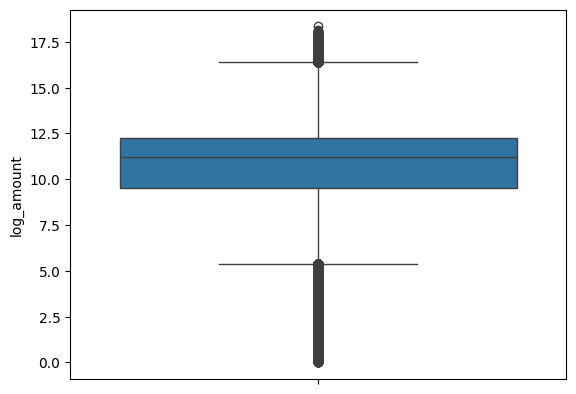

In [ ]:
sns.boxplot(df['log_amount'])

In [ ]:
df['log_amount'].describe()

,log_amount
count,6.362620e+06
mean,1.084087e+01
std,1.814509e+00
min,0.000000e+00
25%,9.502306e+00
50%,1.122355e+01
75%,1.224876e+01
max,1.834213e+01


# data visualization

<Axes: xlabel='type', ylabel='count'>

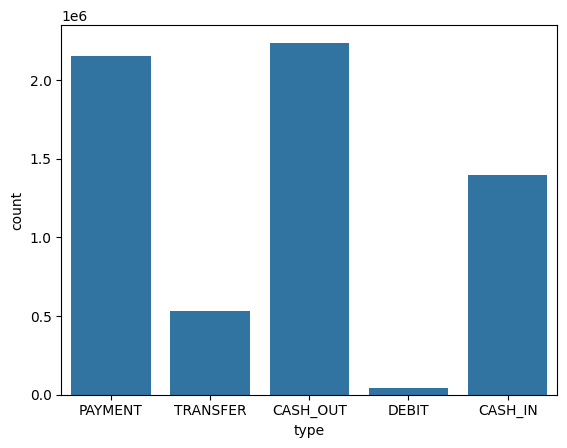

In [ ]:
sns.countplot(df,x='type')

<Axes: xlabel='isFraud', ylabel='count'>

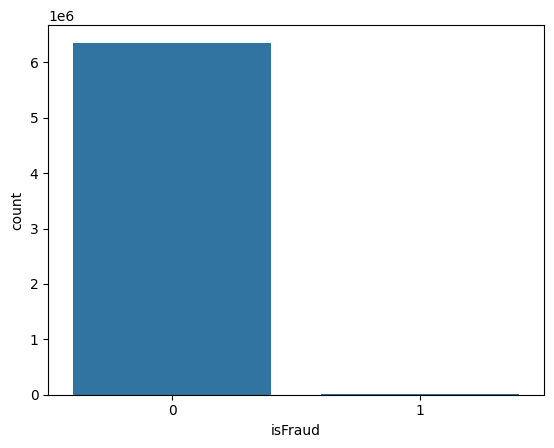

In [ ]:
sns.countplot(df,x='isFraud')

<Axes: xlabel='amount', ylabel='Count'>

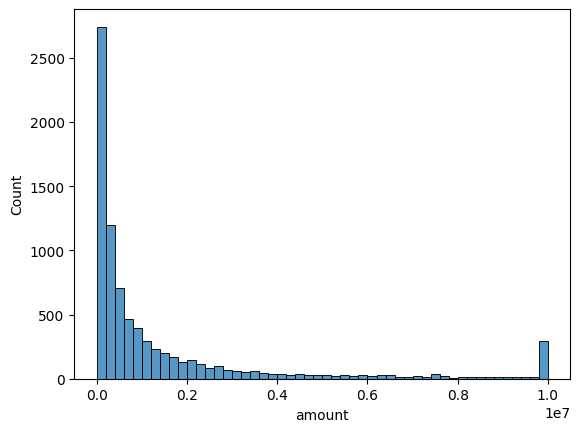

In [ ]:
sns.histplot(df[df['isFraud']==1]['amount'],bins=50)

# data preprocessing

In [ ]:
df.drop(['nameOrig', 'nameDest'],axis=1,inplace=True)

In [ ]:
# Add balance difference features
df['bal_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['bal_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,bal_diff_orig,bal_diff_dest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,9.194276,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,7.531166,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,5.204007,181.00,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

sc = StandardScaler()
c = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[c] = sc.fit_transform(df[c])

df.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,bal_diff_orig,bal_diff_dest
0,1,3,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,9.194276,9839.64,0.0
1,1,3,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,7.531166,1864.28,0.0
2,1,4,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,5.204007,181.00,0.0


In [ ]:
df.describe(include='all')

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,bal_diff_orig,bal_diff_dest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,-4.946736e-17,-1.779646e-17,6.590049e-16,1.498762e-16,-1.340452e-16,1.290820e-03,2.514687e-06,1.084087e+01,-2.123056e+04,1.242947e+05
std,1.423320e+02,1.350117e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.590480e-02,1.585775e-03,1.814509e+00,1.466433e+05,8.129391e+05
min,1.000000e+00,0.000000e+00,-2.978545e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01,0.000000e+00,0.000000e+00,0.000000e+00,-1.915268e+06,-1.306083e+07
25%,1.560000e+02,1.000000e+00,-2.756812e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01,0.000000e+00,0.000000e+00,9.502306e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,-1.738653e-01,-2.837972e-01,-2.924417e-01,-2.847734e-01,-2.749863e-01,0.000000e+00,0.000000e+00,1.122355e+01,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,4.779197e-02,-2.515606e-01,-2.431065e-01,-4.638324e-02,-3.077931e-02,0.000000e+00,0.000000e+00,1.224876e+01,1.015044e+04,1.491054e+05
max,7.430000e+02,4.000000e+00,1.527936e+02,2.034149e+01,1.666523e+01,1.044120e+02,9.660911e+01,1.000000e+00,1.000000e+00,1.834213e+01,1.000000e+07,1.056878e+08


In [ ]:
corr = df.corr()
corr

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,bal_diff_orig,bal_diff_dest
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,0.007377,0.007255,0.001325
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685,-0.377539,0.342153,0.169399
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,0.387260,0.102337,0.845964
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,0.106980,-0.220297,-0.087032
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,0.111453,-0.267750,-0.094456
oldbalanceDest,0.027665,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.227789,-0.047460,0.232316
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.266023,-0.006451,0.436191
isFraud,0.031578,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.040640,0.362472,0.027028
isFlaggedFraud,0.003277,0.002685,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,0.003604,0.000230,-0.000242
log_amount,0.007377,-0.377539,0.387260,0.106980,0.111453,0.227789,0.266023,0.040640,0.003604,1.000000,-0.115298,0.249841


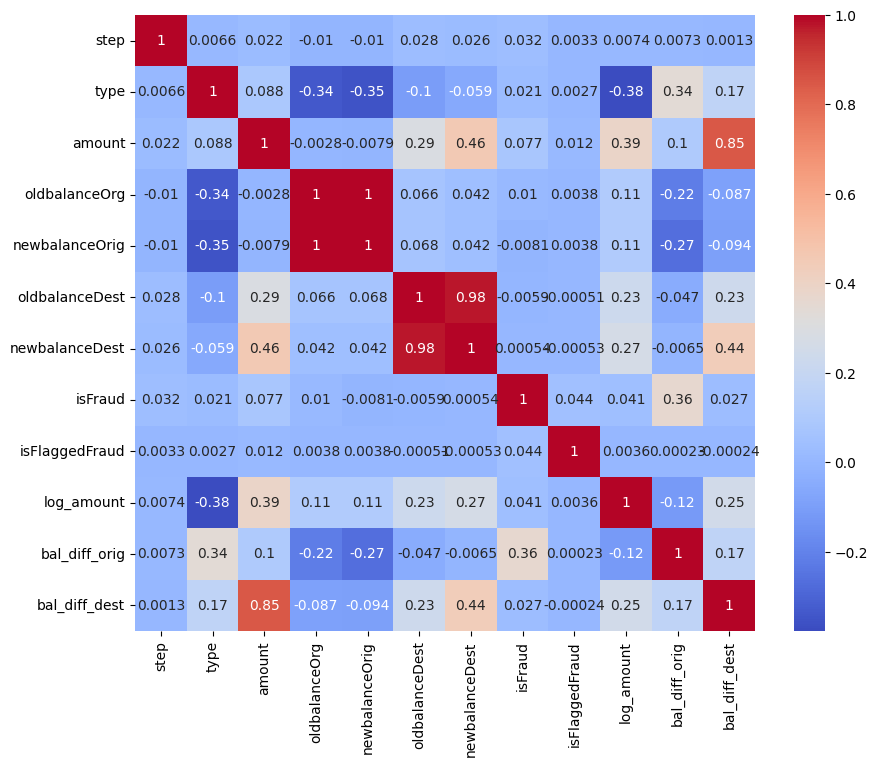

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['isFraud','isFlaggedFraud'],axis=1)
y = df['isFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=6)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

dt_acc = accuracy_score(y_test, y_pred)
print(dt_acc)
print(classification_report(y_test, y_pred))

0.9995269244430753
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.96      0.66      0.78      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.83      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



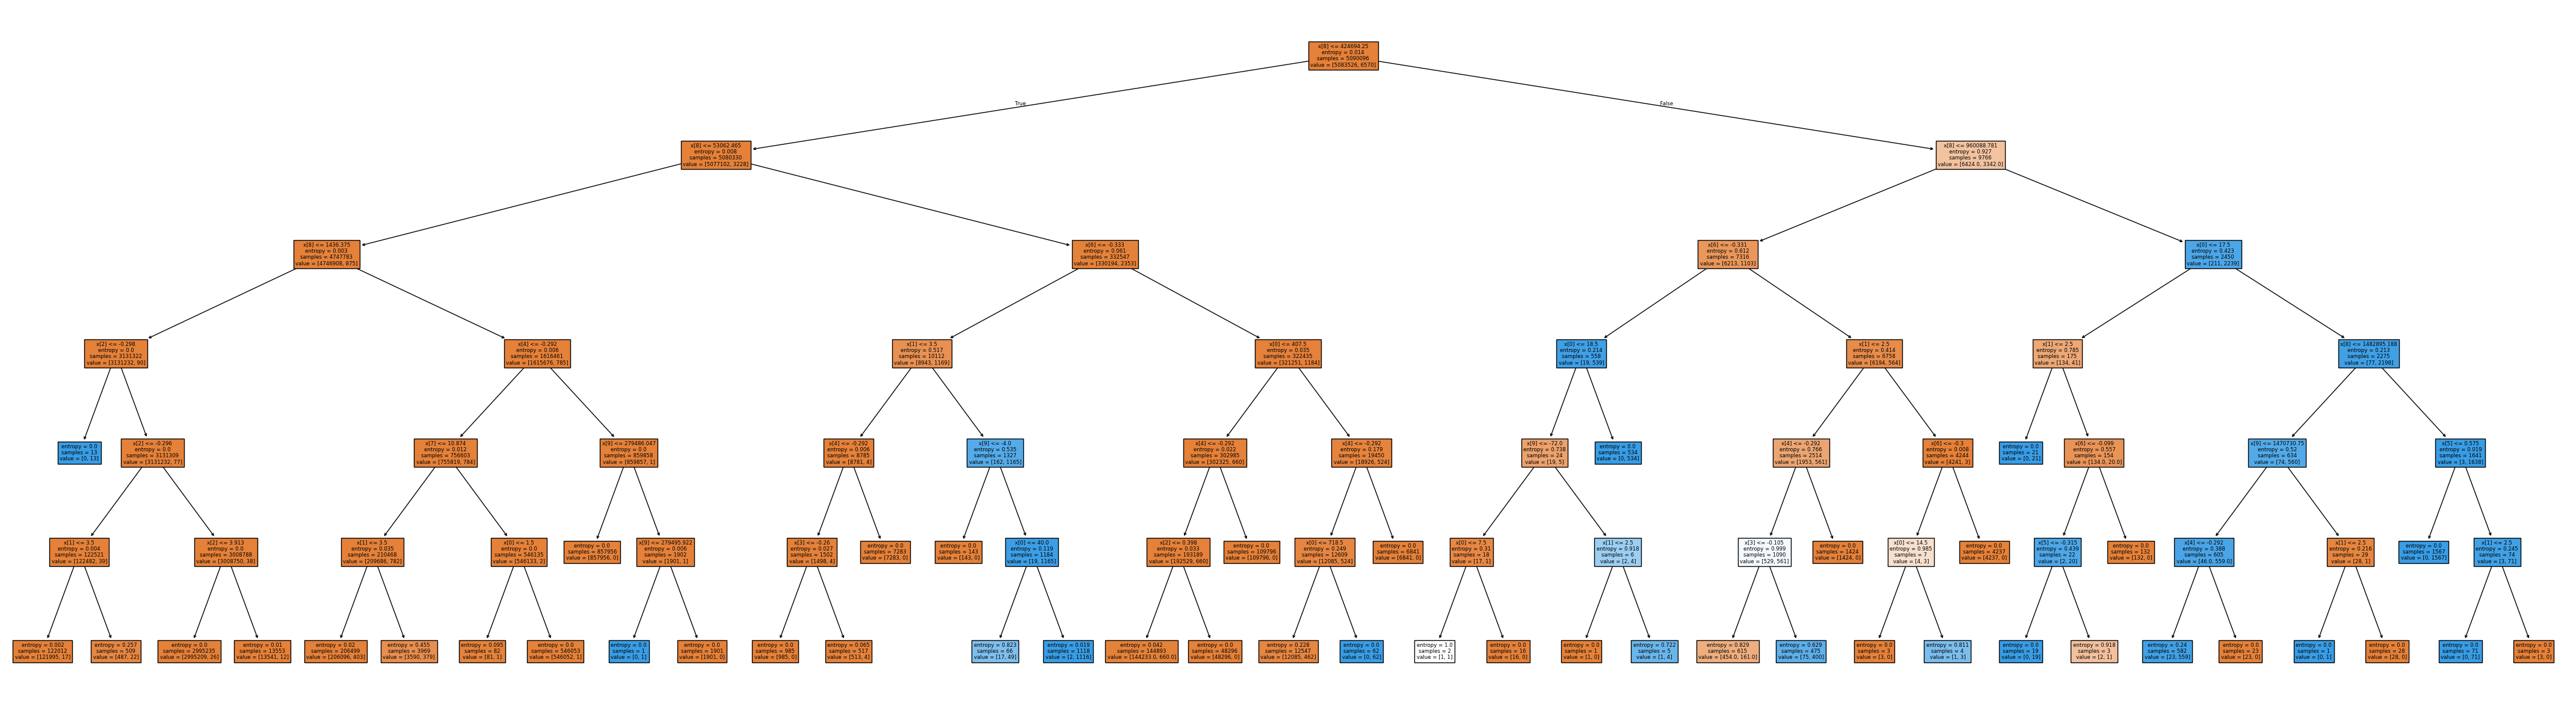

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=[55,15])
plot_tree(dt,filled=True)
plt.show()

XGBoost - Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)
print(classification_report(y_test,y_pred))

0.9997736781388799
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.96      0.86      0.91      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.93      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rtree = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
rtree.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rtree.predict(x_test)

rtree_acc = accuracy_score(y_test, y_pred)
print(rtree_acc)
print(classification_report(y_test,y_pred))

0.9997532463041955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.84      0.90      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.92      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



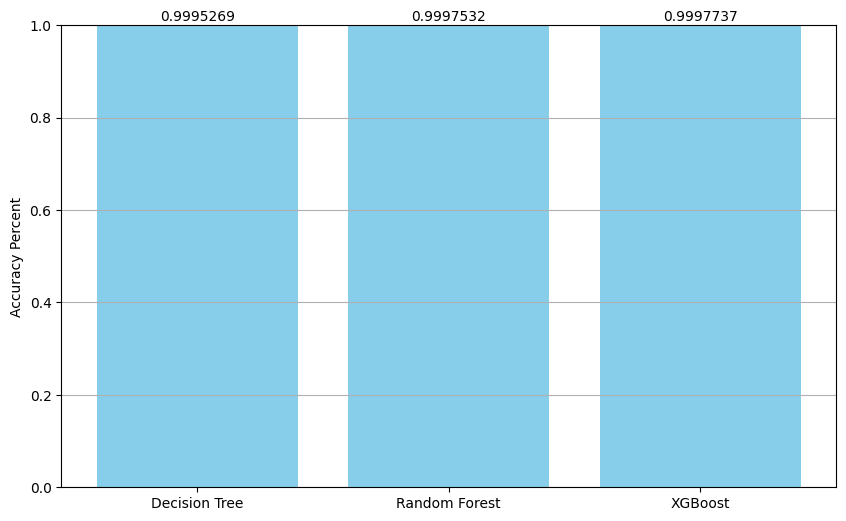

In [ ]:
accuracies = {
    "Decision Tree": dt_acc,
    "Random Forest": rtree_acc,
    "XGBoost": xgb_acc,
}

plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel("Accuracy Percent")
plt.ylim(0, 1)
for i, (k, v) in enumerate(accuracies.items()):
    plt.text(i, v + 0.01, f"{v:.7f}", ha='center', fontsize=10)
plt.grid(axis='y')
plt.show()

XGBoost gives the best accuracy - 99.97737%

**Describe Fraud Detection Model in detail.**<br>
I have built a few supervised classification models for the objective here (detect fraudulent financial transactions). I trained (and compared) 3 different models - Decision Trees, Random Forest & XGBoost. Out of these, XGBoost gives the best accuracy and the highest f1-score, indicating its effectiveness in learning the patterns in this dataset.<br><br>

**How did you select variables to be included in the model?**<br>
Removed identifier columns (nameOrig, nameDest) as they don't provide meaningful predective power and created domain-relevant features capturning money anomalies. The latter includes:


*   *bal_diff_orig* - captures how money was actually withdrawn from the origin account - a large value with a zero newbalanceOrig would be suspicious

*   *bal_diff_dest* - how much the destination account received - a low value with a high amount would be suspicious

The above 2 cols appear to have a high correlation with the pre-defined/given isFraud column.
<br><br>

**What are the key factors that predict fraudulent customer?**<br>
These can be determined based on feature correlation with isFraud and domain knowledge. On studying the correlation matrix, we find that bal_diff_orig, type, amount (and log_amount) and destination balances are key factors.
<br><br>

**Do these factors make sense? If yes, How? If not, How not?**<br>
Yes, these factors absolutely make sense. Fraudsters typically use 'transfer' and 'cash_out' types. They often empty origin accounts - anomolous balance changes are clear fraud indicators.
<br><br>

**What kind of prevention should be adopted while company update its infrastructure?**<br>


*   real-time anomoly detection
*   multifactor authentication for transactions
*   maintain logs of flagged transactions for review and analysis - can be used to improve model as well
<br><br>

**Assuming these actions have been implemented, how would you determine if they work?**<br>


* fewer customer complaints may indicate a success  
* tracking the % of fraudulent transactions before and after model deployment.